# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [265]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns


In [266]:
#1-	Veri setini okuyun.
df1=pd.read_csv("sales_data.csv")
df2=pd.read_csv("customer_data.csv")


# ID sütunu üzerinden birleştir (yan yana ekleme)
birlesik_df = pd.merge(df1, df2, on="customer_id", how="inner")  # outer, left, right da kullanılabilir

birlesik_df.to_csv("birlesik_dosya.csv", index=False, encoding='utf-8-sig')

In [285]:

#1-	Veri setini okuyun.
df=pd.read_csv("birlesik_dosya.csv")
#2-	İlk 20 veri
print(df.head(20))

   invoice_no customer_id         category  quantity    price invoice_date  \
0     I138884     C241288         Clothing         5  1500.40   05-08-2022   
1     I317333     C111565            Shoes         3  1800.51   12-12-2021   
2     I127801     C266599         Clothing         1   300.08   09-11-2021   
3     I173702     C988172            Shoes         5  3000.85   16-05-2021   
4     I337046     C189076            Books         4    60.60   24-10-2021   
5     I227836     C657758         Clothing         5  1500.40   24-05-2022   
6     I121056     C151197        Cosmetics         1    40.66   13-03-2022   
7     I293112     C176086         Clothing         2   600.16   13-01-2021   
8     I293455     C159642         Clothing         3   900.24   04-11-2021   
9     I326945     C283361         Clothing         2   600.16   22-08-2021   
10    I306368     C240286  Food & Beverage         2    10.46   25-12-2022   
11    I139207     C191708            Books         1    15.15   

In [268]:
# Satır ve sütun sayısını gösterir
df.shape

(99457, 10)

In [287]:
df["price"].fillna(df.price.mean())

0        1500.40
1        1800.51
2         300.08
3        3000.85
4          60.60
          ...   
99452      58.65
99453      10.46
99454      10.46
99455    4200.00
99456      35.19
Name: price, Length: 99457, dtype: float64

In [269]:
# Veri setindeki sütun adlarını görüntüleyin
print(df.columns)

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall', 'gender', 'age', 'payment_method'],
      dtype='object')


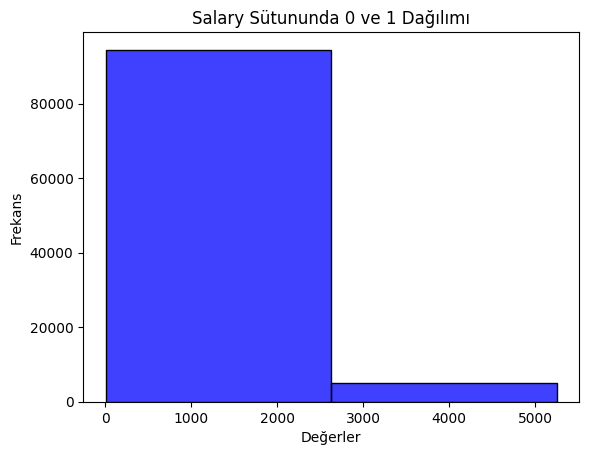

In [270]:
# Salary sutunundaki 0 ve 1'in dağılımını gösteren histogram
sns.histplot(df['price'], kde=False, bins=2, color='blue')
plt.title('Salary Sütununda 0 ve 1 Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()

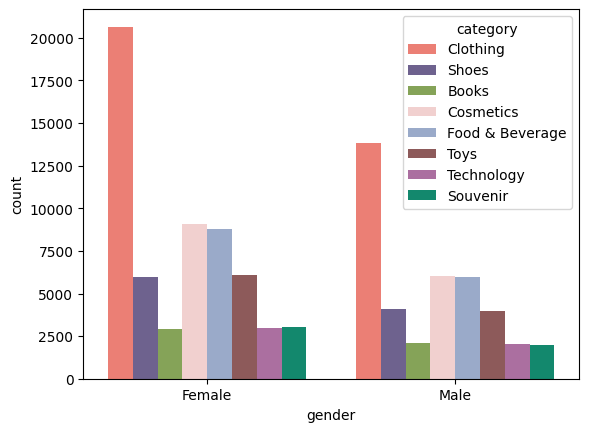

In [271]:
color= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9","#92A8D1", "#955251", "#B565A7", "#009B77"]
sns.countplot(x="gender", hue="category", data=df, palette=color)
plt.show()

In [272]:
# 5-Tüm parametrelerin veri türlerini görüntüleyin.
print(df.dtypes)

invoice_no         object
customer_id        object
category           object
quantity            int64
price             float64
invoice_date       object
shopping_mall      object
gender             object
age               float64
payment_method     object
dtype: object


In [273]:
#6-	Veri seti hakkında istatistiksel bilgileri gösterin.
print(df.describe())

           quantity         price           age
count  99457.000000  99457.000000  99338.000000
mean       3.003429    689.256321     43.425859
std        1.413025    941.184567     14.989400
min        1.000000      5.230000     18.000000
25%        2.000000     45.450000     30.000000
50%        3.000000    203.300000     43.000000
75%        4.000000   1200.320000     56.000000
max        5.000000   5250.000000     69.000000


In [274]:
print(df.describe(include='object'))

       invoice_no customer_id  category invoice_date     shopping_mall  \
count       99457       99457     99457        99457             99457   
unique      99457       99457         8          797                10   
top       I232867     C273973  Clothing   24-11-2021  Mall of Istanbul   
freq            1           1     34487          159             19943   

        gender payment_method  
count    99457          99457  
unique       2              3  
top     Female           Cash  
freq     59482          44447  


In [275]:
#7-	Verisetinde eksik verileri gösterin.
print(df.isnull().sum())

invoice_no          0
customer_id         0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
gender              0
age               119
payment_method      0
dtype: int64


In [276]:
#8-	Verisetinde eksik veri  olduğunu varsayarak, problemin çözümü gösterin.
# Eksik veriye sahip satırları sil
df_cleaned1 = df.dropna(axis=0)


In [277]:
# Eksik veriye sahip sütunları sil
df_cleaned = df.dropna(axis=1)

In [278]:
#9-	Verisetindeki AGE kolonunun ortalamasını bulun
average_age = df['age'].mean()
print(f"Age sütununun ortalaması: {average_age}")

Age sütununun ortalaması: 43.42585918782339


In [279]:
#10-Verisetindeki price kolonunda en yüksek değeri bulun
max_price = df['price'].max()
print(f"price sütununun en yüksek değeri: {max_price}")

price sütununun en yüksek değeri: 5250.0


In [280]:
# 11-Gender sütununa göre price sütununun ortalamasını bulma
average_salary_by_gender = df.groupby('gender')['price'].mean()
print(average_salary_by_gender)

gender
Female    688.137615
Male      690.920933
Name: price, dtype: float64


In [281]:
#12-Kategorik verilerden oluşan kolonda 'Experience_Years'
#kaç farklı veri olduğunu bulun.
unique_category_count = df['category'].nunique()
print(f"category sütununda {unique_category_count} farklı değer var.")

category sütununda 8 farklı değer var.


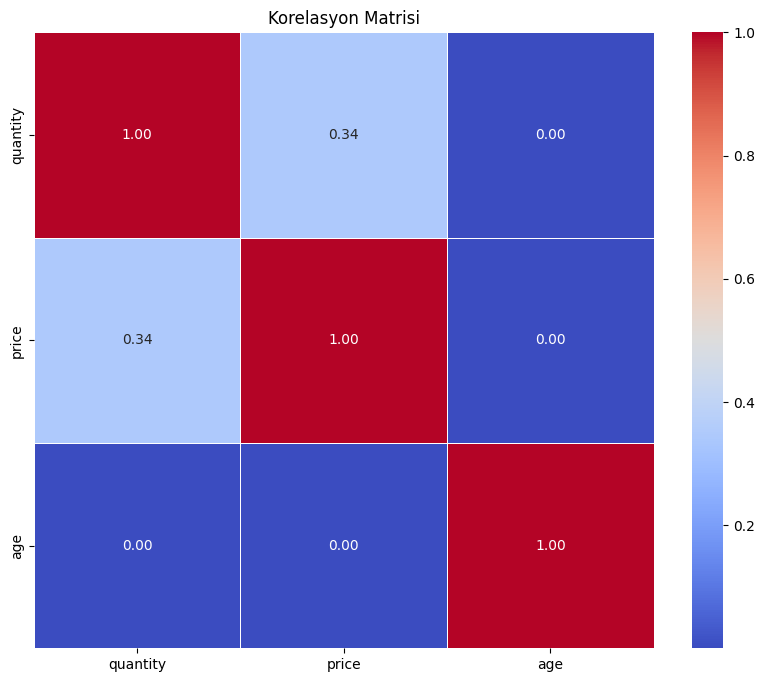

In [282]:
#Korelasyon matrisini oluştur
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [283]:
# Bağımlı değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = df[['category', 'age', 'gender']]  # Bağımsız değişkenler
y = df['price']  # Bağımlı değişken (Salary)
print("Bağımsız değişkenler (X):")
print(X.head())
print("\nBağımlı değişken (y):")
print(y.head())

Bağımsız değişkenler (X):
   category   age  gender
0  Clothing  28.0  Female
1     Shoes  21.0    Male
2  Clothing  20.0    Male
3     Shoes  66.0  Female
4     Books  53.0  Female

Bağımlı değişken (y):
0    1500.40
1    1800.51
2     300.08
3    3000.85
4      60.60
Name: price, dtype: float64


In [284]:
#15-Veri setini test ve train (eğitim) olarak ayırın.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Eğitim veri seti boyutu (X_train, y_train): {X_train.shape}")
print(f"Test veri seti boyutu (X_test, y_test): {X_test.shape}")

Eğitim veri seti boyutu (X_train, y_train): (79565, 3)
Test veri seti boyutu (X_test, y_test): (19892, 3)
